Beata Sirowy
# Apache Kafka Python client
Based on the IBM Data Engineering Professional Certificate, _ETL and Data Pipelines with Shell, Airflow and Kafka_  <br> Images' copyright: IBM Skills Network 

- Kafka has a distributed client-server architecture. 
- For the server side, Kafka is a cluster with many associated servers called broker, acting as the event broker to receive, store, and distribute events. 
- It also has some servers that run "Kafka Connect" to import and export data as event streams. 

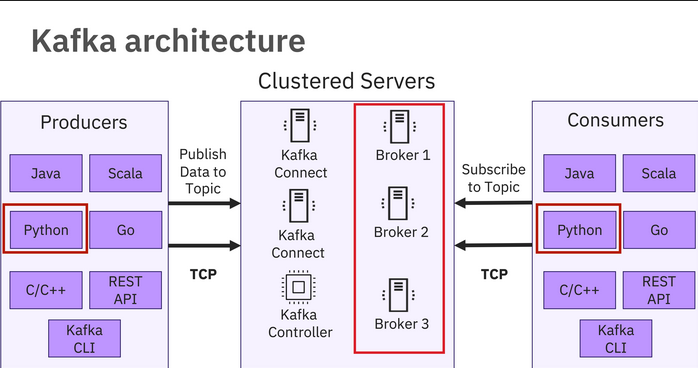

__Producers__ send or publish  data to the Topic  and the __consumers__ subscribe to the topic to receive data. Kafka uses a TCP-based network communication protocol to exchange data between clients and servers.

## Kafka-python package

kafka-python is a Python client for the Apache Kafka distributed stream processing system, which aims to provide similar functionalities as the main Kafka Java client. 

With kafka-python, you can easily interact with your Kafka server on tasks such as managing topics, publishing, and consuming messages in Python programming language.



1. We install kafka-python using pip3 installer to use it with a Python client.

__pip3 install kafka-python__

2. In the terminal, we create a file named admin.py

__touch admin py__

We open the file in edit mode and continue with Python code. 

3. In the next step we define KafkaAdminClient. The code  

The main purpose of KafkaAdminClient class is to enable fundamental administrative management operations on kafka server such as creating/deleting topic, retrieving, and updating topic configurations and so on.

To use KafkaAdminClient, you first need to define and create a KafkaAdminClient object.

In [ ]:
admin_client = KafkaAdminClient(bootstrap_servers="localhost:9092", client_id='test')

- bootstrap_servers="localhost:9092" argument specifies the host/IP and port that the consumer should contact to bootstrap initial cluster metadata
- client_id specifies an id of current admin client

The most common use of the admin_client is managing topics, such as creating and deleting topics. 

4. To create topics, you must first define an empty topic list:

In [ ]:
topic_list = []

5. Then, you use the NewTopic class to create a topic with name, partition, and replication factors. For example, name equals bankbranch, partition nums equals 2, and replication factor equals 1.


In [ ]:
new_topic = NewTopic(name="bankbranch", num_partitions= 2, replication_factor=1)
topic_list.append(new_topic)

6. You can use create_topics(...) method to create topics.


In [ ]:
admin_client.create_topics(new_topics=topic_list)

Note: The create topic operation used above is equivalent to using kafka-topics.sh --topic in Kafka CLI client.

__Summing up__ we created the following code (saved as admin.py):

In [ ]:
from kafka.admin import KafkaAdminClient,NewTopic
admin_client = KafkaAdminClient(bootstrap_servers="localhost:9092", client_id='test')
topic_list = []
new_topic = NewTopic(name="bankbranch", num_partitions= 2, replication_factor=1)
topic_list.append(new_topic)
admin_client.create_topics(new_topics=topic_list)

6. After the topics are created, you can check its configuration details using the describe_configs() method.

In [ ]:
configs = admin_client.describe_configs(
    config_resources=[ConfigResource(ConfigResourceType.TOPIC, "bankbranch")])

Note: The describe topic operation used above is equivalent to using kafka-topics.sh --describe in Kafka CLI client.

### KafkaProducer

Having created the new bankbranch topic, you can start producing messages.

For kafka-python, you will use KafkaProducer class to produce messages. Since many real-world message values are in the JSON format, let's look at how to publish JSON messages as an example.

1. First, we create a file named producer.py 

__touch producer.py__

We open the file in edit mode and continue with Python code


2. We define and create a KafkaProducer.

In [ ]:
producer = KafkaProducer(value_serializer=lambda v: json.dumps(v).encode('utf-8'))

Since Kafka produces and consumes messages in raw bytes, you need to encode our JSON messages and serialize them into bytes. For the value_serializer argument, you will define a lambda function to take a Python dict/list object and serialize it into bytes.

3. Then, with the KafkaProducer created, you can use it to produce two ATM transaction messages in JSON format as follows:

In [ ]:
producer.send("bankbranch", {'atmid':1, 'transid':100})
producer.send("bankbranch", {'atmid':2, 'transid':101})

 The first argument specifies the topic bankbranch to be sent and the second argument represents the message value in a Python dict() format and will be serialized into bytes.

Note: The above producing message operation is equivalent to using kafka-console-producer.sh --topic in Kafka CLI client.


__Summing up__  we created the following code (saved as producer.py):

In [ ]:
from kafka import KafkaProducer
import json
producer = KafkaProducer(value_serializer=lambda v: json.dumps(v).encode('utf-8'))
producer.send("bankbranch", {'atmid':1, 'transid':100})
producer.send("bankbranch", {'atmid':2, 'transid':101})

producer.flush()

producer.close()

### KafkaConsumer

In the previous step, we published two JSON messages. Now, we can use the KafkaConsumer class to consume the messages.

1. First, we create a file named producer.py 

__touch consumer.py__

We open the file in edit mode and continue with Python code

2.  Define and create a KafkaConsumer subscribing to the topic bankbranch:

In [ ]:
consumer = KafkaConsumer('bankbranch')

3. Once the consumer is created, it will receive all available messages from the topic bankbranch. Then, you can iterate and print them with the following code snippet:

In [ ]:
for msg in consumer:
    print(msg.value.decode("utf-8"))

__Summing up__  we created the following code (saved as producer.py):

In [ ]:
from kafka import KafkaConsumer
consumer = KafkaConsumer('bankbranch',
                        group_id=None,
                         bootstrap_servers=['localhost:9092'],
                         auto_offset_reset = 'earliest')
print("Hello")
print(consumer)

for msg in consumer:
    print(msg.value.decode("utf-8"))

## Execute the three Python files

1. Execute admin.py and producer.py using the following commands in terminal:

__python3 admin.py__
__python3 producer.py__

2. Open a new terminal and execute the following commands to run consumer.py:

__cd kafka_2.13-3.8.0__ <br>
__python3 consumer.py__